In [66]:
import numpy as np
import dataframe as df
from keras import *
from keras.layers import *
from keras.regularizers import *
from keras.datasets import *
from keras.models import *
from keras.optimizers import *
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

In [67]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [68]:
x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


MSE performs much better than MAE in autoencoders. They also can achieve very low loss. 
Instad of softmax use sigmoid for better visualization of the decoded image.

In [33]:
MSE performs much better than MAE in autoencoders. They also can achieve very low loss. 
Instad of softmax use sigmoid for better visualization of the decoded image.

SyntaxError: invalid syntax (<ipython-input-33-e5dc56210d5a>, line 1)

In [70]:
history = autoencoder.fit(x_train,x_train, batch_size = 128, epochs = 10 , verbose = 1 , validation_split=0.1 )

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.0461 - val_loss: 0.0241
Epoch 2/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0190 - val_loss: 0.0146
Epoch 3/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0121 - val_loss: 0.0100
Epoch 4/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0086 - val_loss: 0.0075
Epoch 5/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0067 - val_loss: 0.0062
Epoch 6/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0057 - val_loss: 0.0054
Epoch 7/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.0051 - val_loss: 0.0050
Epoch 8/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0048 - val_loss: 0.0047
Epoch 9/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0046 - val_loss: 0.0046
Epoch 

In [71]:
decoded_imgs = autoencoder.predict(x_test)

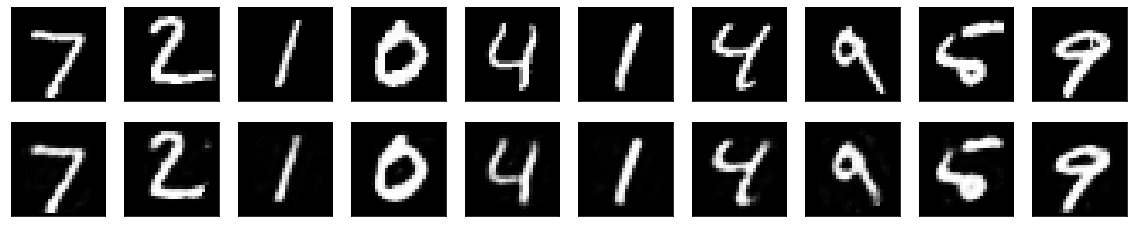

In [72]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

Multilayer Autoencoders

In [74]:
input_size = 784
hidden_size_1 = 128
hidden_size_2 = 64
output_size = 784

#encoders
x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size_1, activation = 'relu')(x)
hidden_2 = Dense(hidden_size_2, activation = 'relu')(hidden_1)

#decoders
hidden_3 = Dense(hidden_size_1, activation = 'relu')(hidden_2)
output = Dense(output_size, activation = 'sigmoid')(hidden_3)

multi_ae = Model(input = x, output = output)
multi_ae.compile(optimizer = 'adam', loss = 'mse')


/home/aminul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [ ]:
earlystopper = EarlyStopping(patience=3, verbose=1)
history = multi_ae.fit(x_train,x_train, epochs = 100, batch_size = 128, 
                       verbose = 1, validation_split=0.1, callbacks =[earlystopper] )

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 3s 64us/step - loss: 0.0431 - val_loss: 0.0207
Epoch 2/100
54000/54000 [==============================] - 4s 71us/step - loss: 0.0169 - val_loss: 0.0140
Epoch 3/100
54000/54000 [==============================] - 3s 58us/step - loss: 0.0127 - val_loss: 0.0113
Epoch 4/100
54000/54000 [==============================] - 3s 55us/step - loss: 0.0106 - val_loss: 0.0101
Epoch 5/100
54000/54000 [==============================] - 3s 59us/step - loss: 0.0095 - val_loss: 0.0091
Epoch 6/100
54000/54000 [==============================] - 3s 60us/step - loss: 0.0087 - val_loss: 0.0084
Epoch 7/100
54000/54000 [==============================] - 3s 61us/step - loss: 0.0080 - val_loss: 0.0078
Epoch 8/100
54000/54000 [==============================] - 3s 62us/step - loss: 0.0074 - val_loss: 0.0072
Epoch 9/100
54000/54000 [==============================] - 3s 59us/step - loss: 0.0070 - val_loss: 0.00

In [ ]:
decoded_imgs = multi_ae.predict(x_test)

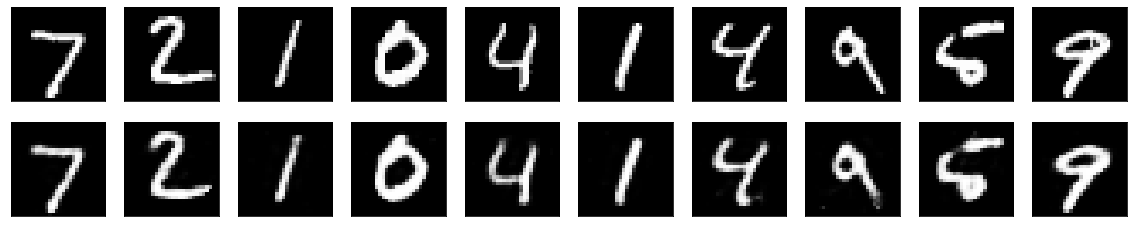

In [64]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

dict_keys(['val_loss', 'loss'])


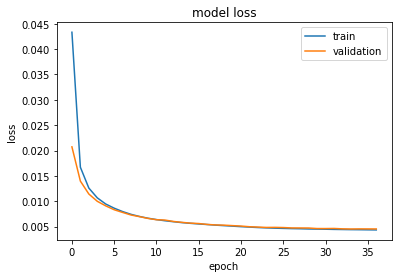

In [65]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()